## Bioimage visualisation with Napari notebook

Napari supports several layer types:
- Image
- Labels
- Points
- Vectors
- Shapes
- Surface
- Tracks

In [4]:
# Create an empty napari viewer

import napari 
viewer = napari.Viewer()


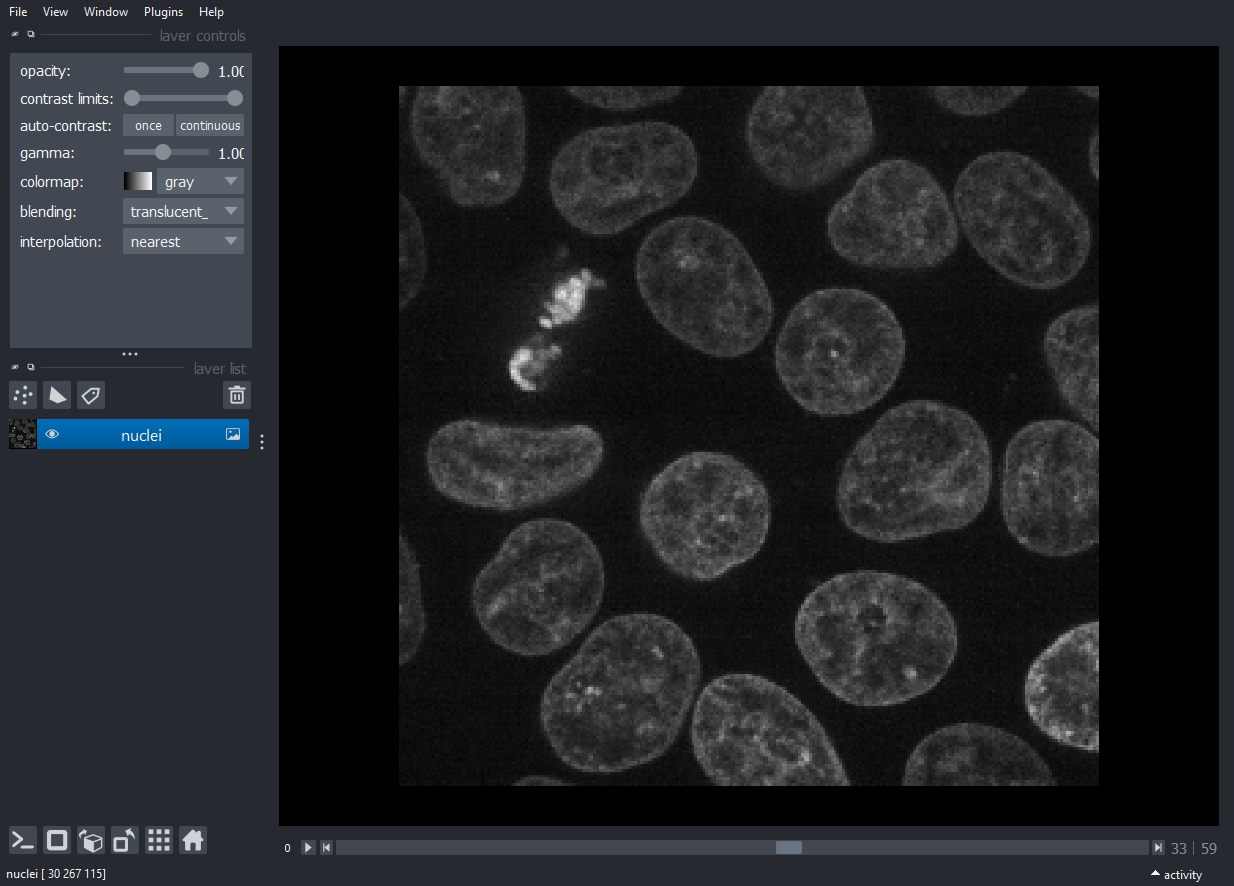

In [7]:
# Napari graphics written in Qt, thus not embedded in notebook
# Screenshot of current state of napari viewer 

from napari.utils import nbscreenshot

nbscreenshot(viewer)

Loading images into viewer:
- By `dragging and dropping` image files onto the viewer
- By selection image files from the `Open File(s)` menu option
- Using the `viewer.open` command with a file path from within the notebook
- Loading the image data into an array and then passing that array using the `viewer.add_image` command

Loading image data into an array:
- Load 3D image using **skicit-image** and **add_image()** method from **Viewer** object

In [1]:
from skimage.io import imread

# load image data + inspect shape
nuclei_path = 'https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/data/nuclei.tif'
nuclei = imread(nuclei_path)
nuclei.shape

(60, 256, 256)

Load data array to viewer

In [5]:
viewer.add_image(nuclei)

<Image layer 'nuclei' at 0x2321a00cd60>

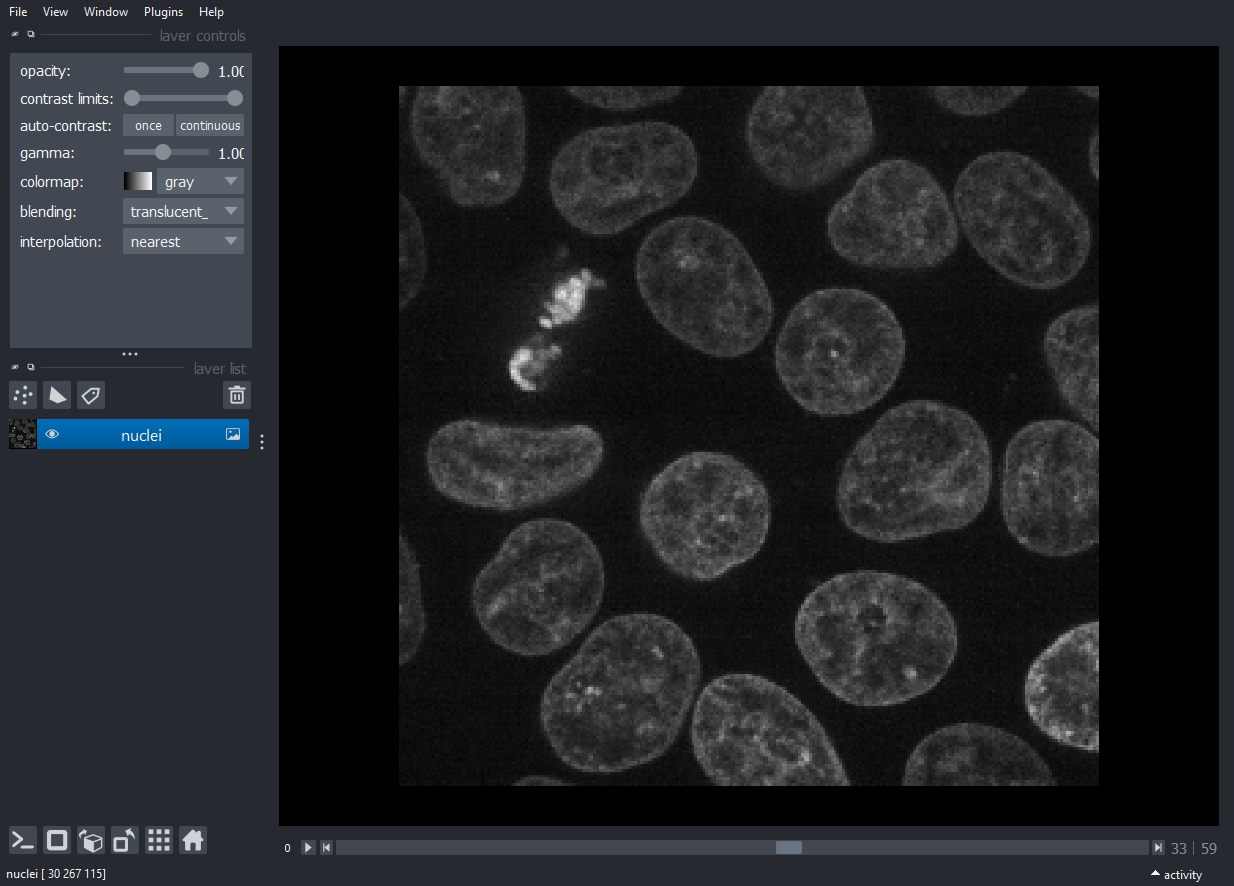

In [8]:
nbscreenshot(viewer)

Colour channels and blending

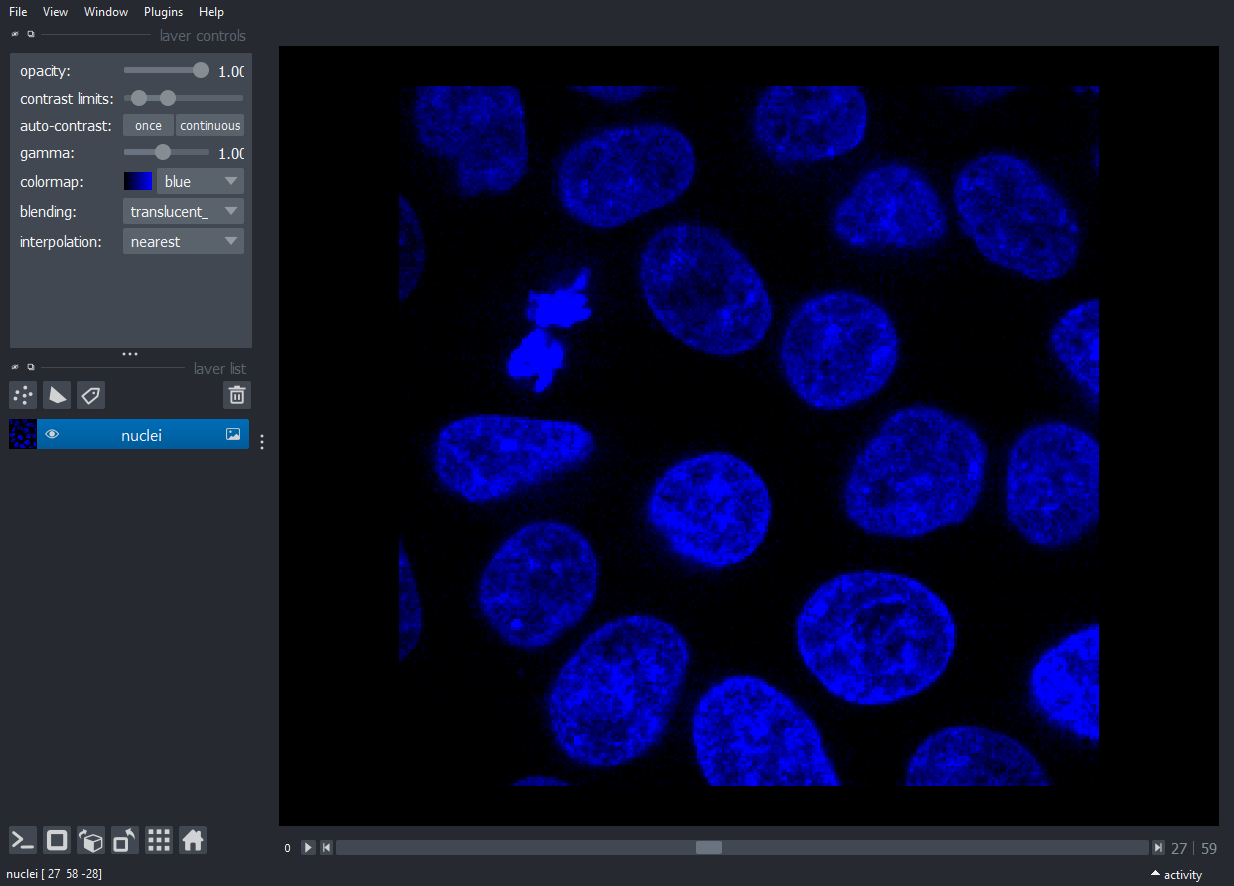

In [9]:
# Right click on contrast limits 
# - for more fine tuned slider
# - can type specific values
# also changed colourmap = blue
nbscreenshot(viewer)


Napari provides control of layer properties both via python + GUI
- each layer that is added to the viewer can be found in viewer.layers list

In [10]:
print(viewer.layers)

[<Image layer 'nuclei' at 0x2321a00cd60>]


- Can index the layer list numerically or by layer name
- This is visuble in bottom left of viewer

In [11]:
nuclei_layer = viewer.layers['nuclei']
first_layer  = viewer.layers[0]
nuclei_layer, first_layer

(<Image layer 'nuclei' at 0x2321a00cd60>,
 <Image layer 'nuclei' at 0x2321a00cd60>)

Modify properties in layer

In [12]:
# print values of 'nuclei' layer properties

print('Colormap: ', viewer.layers['nuclei'].colormap )
print('Contrast limits: ', viewer.layers['nuclei'].contrast_limits)
print('Opacity: ', viewer.layers['nuclei'].opacity)

Colormap:  colors=array([[0., 0., 0., 1.],
       [0., 0., 1., 1.]]) name='blue' interpolation=<ColormapInterpolationMode.LINEAR: 'linear'> controls=array([0., 1.])
Contrast limits:  [0.07, 0.35]
Opacity:  1.0


In [14]:
# modify paramaters, GUI will auto update

viewer.layers['nuclei'].colormap = 'red'
viewer.layers['nuclei'].contrast_limits = [0.4, 0.6]
viewer.layers['nuclei'].opacity = 0.9

# rename layer
viewer.layers['nuclei'].name = 'division'

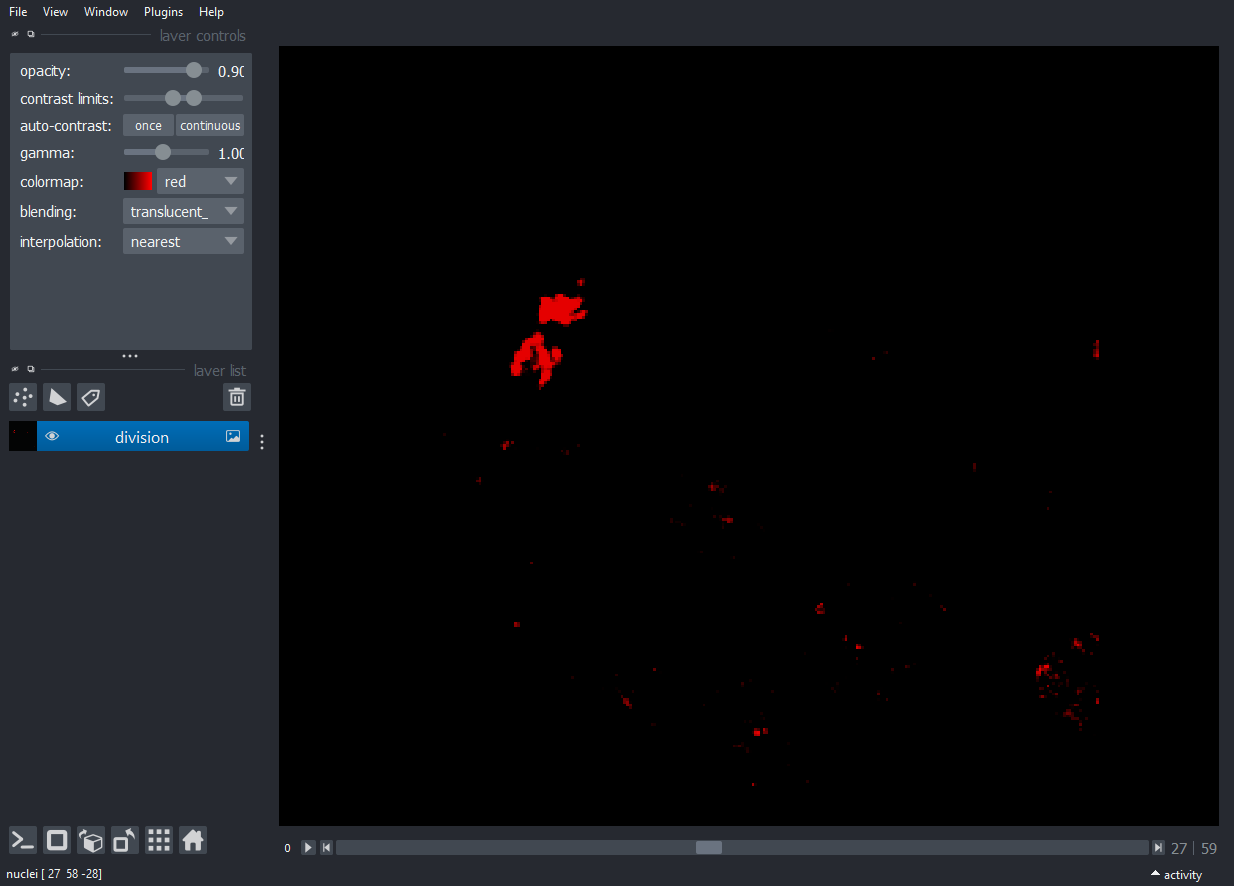

In [15]:
nbscreenshot(viewer)

In [16]:
# add another layer, but use keymaps instead

viewer.add_image(
    nuclei,
    contrast_limits=[0.07, 0.35],
    colormap='blue',
    blending='additive'
)

<Image layer 'nuclei' at 0x2320f4b4850>

In [17]:
# load additional channel for cell membrane dye and add as new layer

from skimage.io import imread

#load image data, inspect shape

membranes_url = 'https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/data/cell_membranes.tif'
membranes = imread(membranes_url)
print(membranes.shape)


(60, 256, 256)


In [19]:
viewer.add_image(
    membranes,
    contrast_limits=[0.02, 0.2],
    colormap='green',
    blending = 'additive'
);

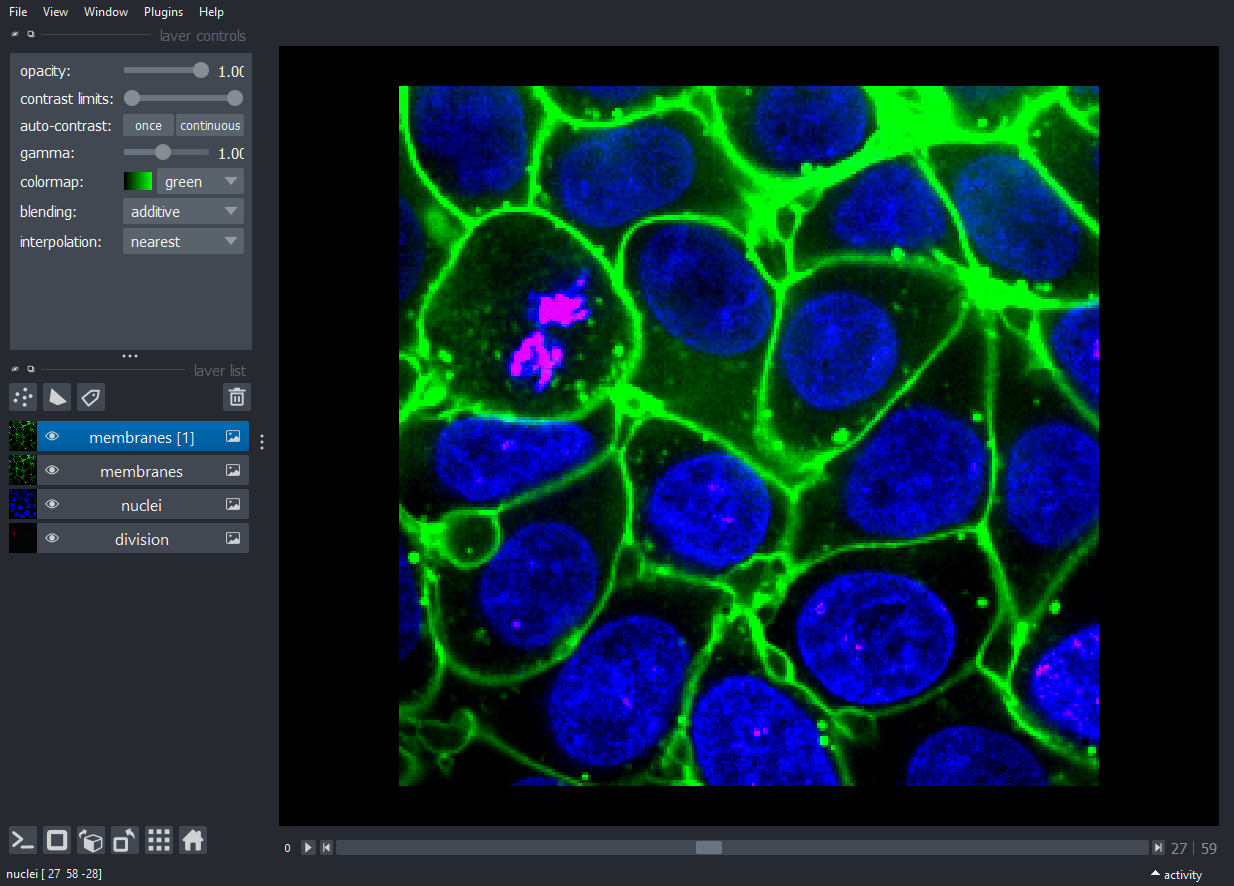

In [20]:
nbscreenshot(viewer)

Orthoganal slicing and 3D rendering

In [21]:
# select slice
viewer.dims.current_step = (45, 0, 0)

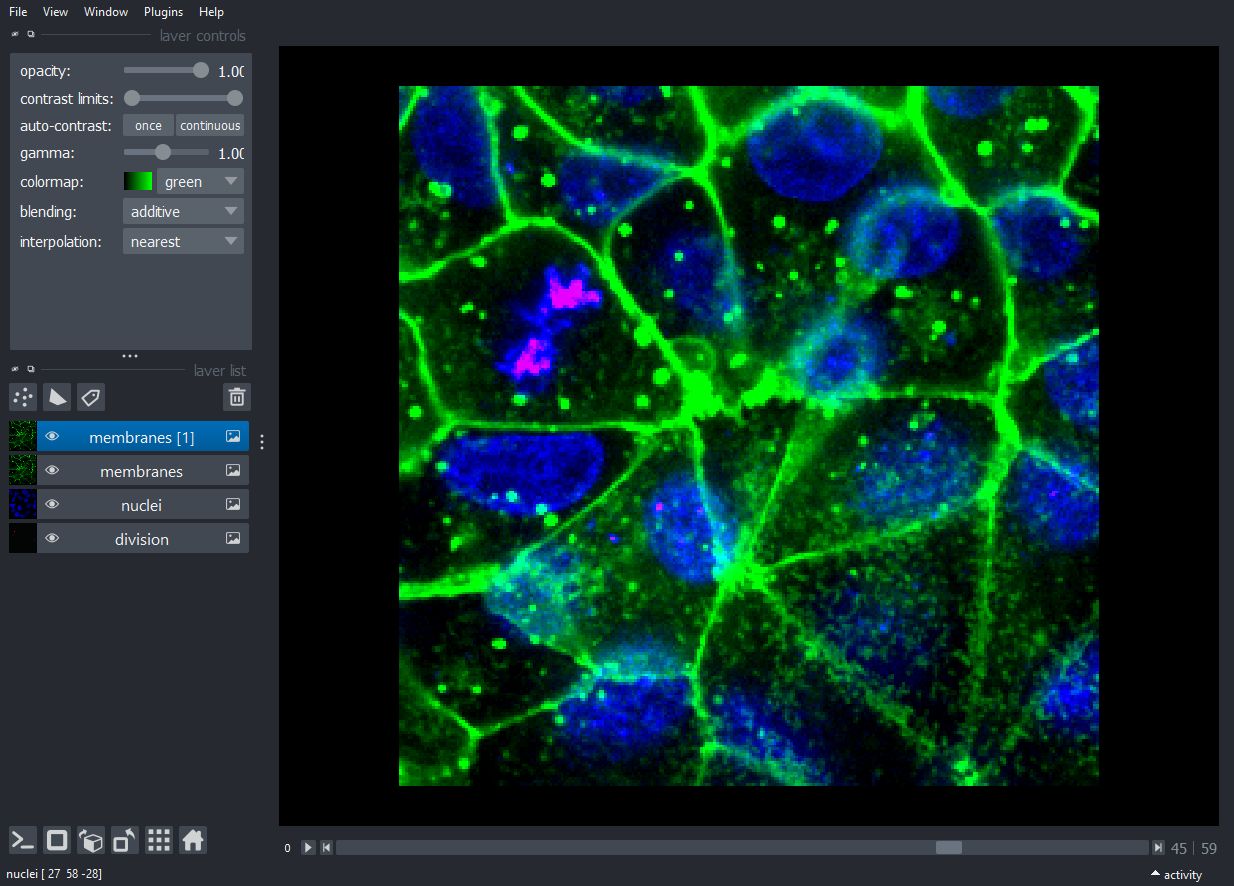

In [22]:
nbscreenshot(viewer)

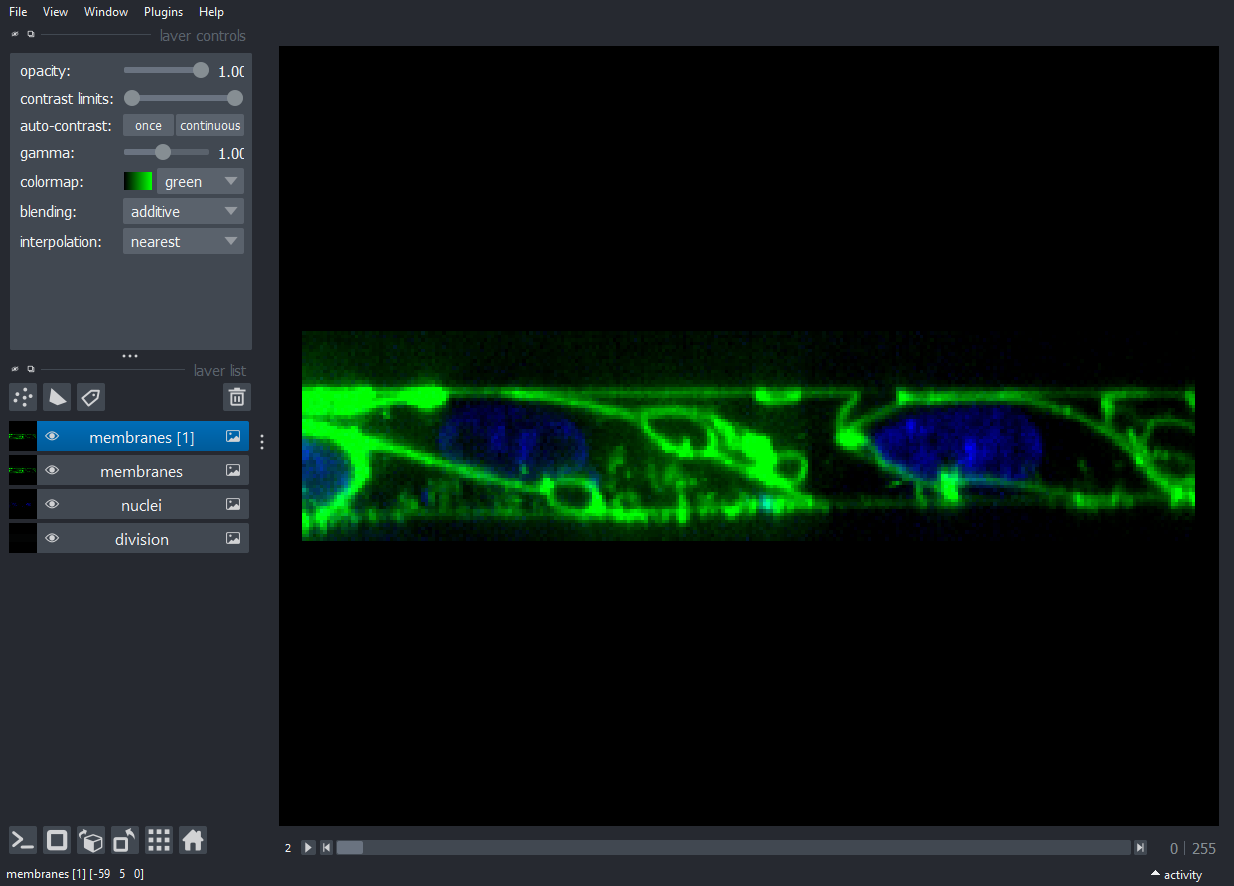

In [23]:
# as its a 3D volume, can look at 2d slices along axis
# Roll Dimensions bottom left hand corner of the viwer
# looks like a 3d cube with arrow

nbscreenshot(viewer)

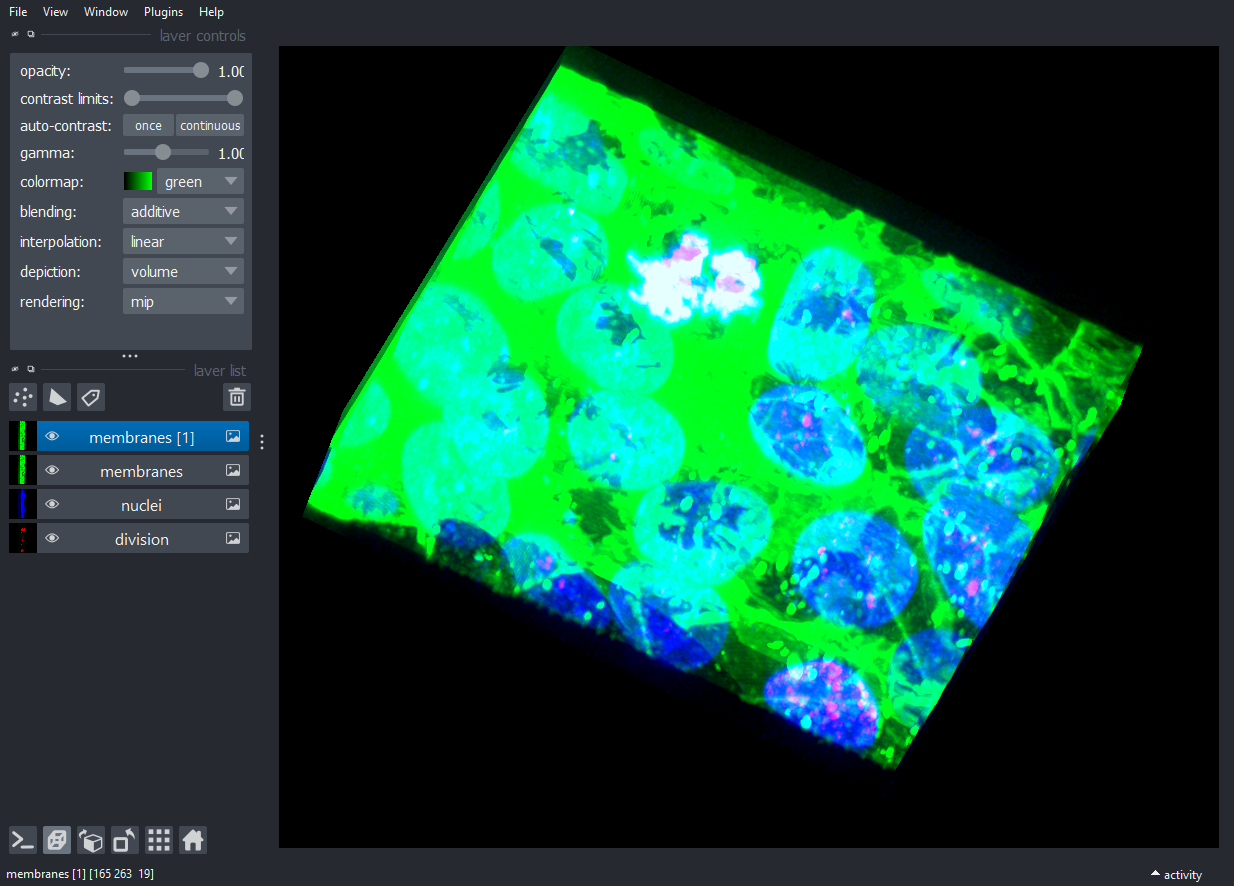

In [24]:
# Full 3D rendering (second button from left)
nbscreenshot(viewer)